# Social Anxiety Dataset - Project

## Goal:
Explore how different lifestyle, biological, and personal factors are related to anxiety levels. We'll visualize, test, and interpret these relationships step by step.


Loading and Viewing the Data

In [8]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Dev\\social-anxiety-analysis\\data\\enhanced_anxiety_dataset.csv')

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [10]:
# Checking missing and duplicate values
df.isnull().sum()
df.duplicated().sum()


# column names
df.columns


Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

## Variables in the Dataset:
- Anxiety Level (1-10): Target variable
- Age
- Gender
- Occupation
- Sleep Hours
- Physical Activity (hrs/week)
- Caffeine Intake (mg/day)
- Alcohol Consumption (drinks/week)
- Smoking
- Family History of Anxiety
- Stress Level (1-10)
- Heart Rate (bpm)
- Breathing Rate (breaths/min)
- Sweating Level (1-5)
- Dizziness
- Medication
- Therapy Sessions (per month)
- Recent Major Life Event
- Diet Quality (1-10)


## Research Questions

1. Is there a relationship between Sleep Hours and Anxiety Level?
2. Do anxiety levels differ between Genders?
3. Does Stress Level predict Anxiety Level?



In [12]:
# Converting object columns like 'Smoking' or 'Gender' to category if needed
df['Gender'] = df['Gender'].astype('category')
df['Smoking'] = df['Smoking'].astype('category')
df['Dizziness'] = df['Dizziness'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')


RQ1: Is there a relationship between Sleep Hours and Anxiety Level?
This is a classic correlation task:

Both variables are numeric



What I see:
People report how many hours they sleep and their anxiety levels (on a scale of 1 to 10).

What I think:
"People who sleep less might experience more anxiety. Lack of sleep affects mood and stress response."

So we’re expecting a negative relationship:

More sleep → Less anxiety

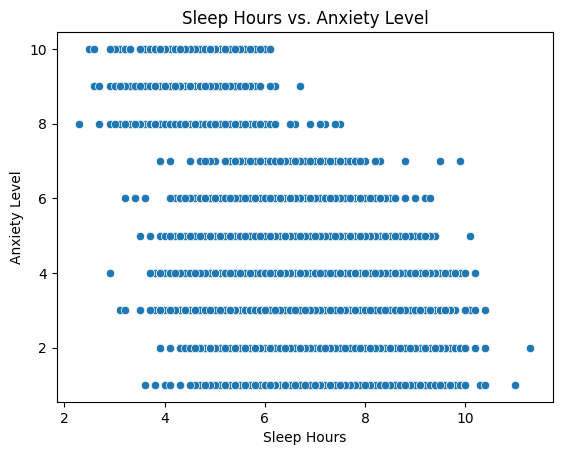

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Sleep Hours', y='Anxiety Level (1-10)', data=df)
# sns.regplot(x='Sleep Hours', y='Anxiety Level (1-10)', data=df, line_kws={'color': 'red'})
plt.title("Sleep Hours vs. Anxiety Level")
plt.xlabel("Sleep Hours")
plt.ylabel("Anxiety Level")
plt.show()


What I see from the plot:
If the dots tend to slope downward, that suggests:

People who sleep more have lower anxiety
If it’s a messy cloud, then there might not be a strong connection.

The dots are not totally random — there’s a slight downward shape.

When sleep is lower (2–4 hours), there are more people with high anxiety (8–10)

When sleep is higher (8–10 hours), people tend to have lower anxiety (mostly 2–4)

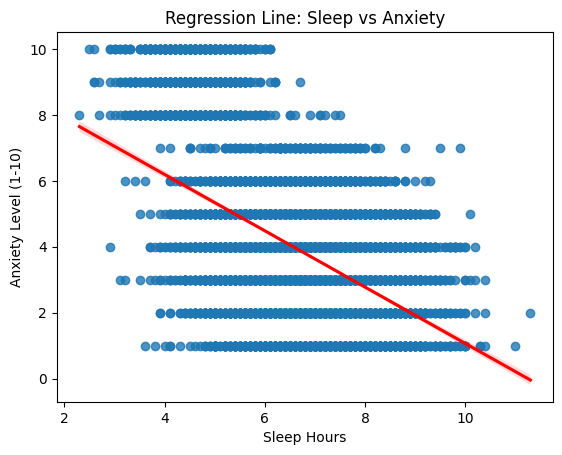

In [23]:
sns.regplot(x='Sleep Hours', y='Anxiety Level (1-10)', data=df, line_kws={'color':'red'})
plt.title("Regression Line: Sleep vs Anxiety")
plt.show()


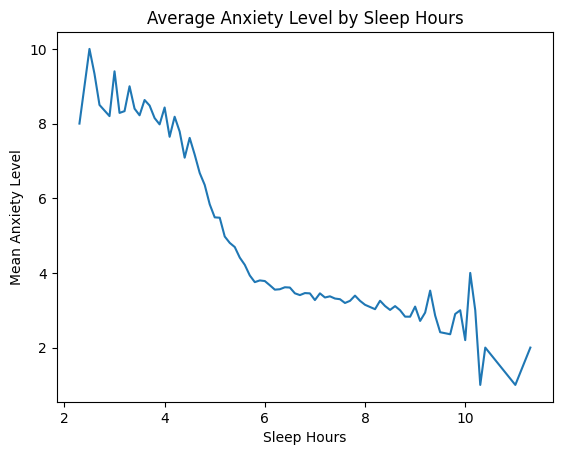

In [25]:
df_grouped = df.groupby('Sleep Hours')['Anxiety Level (1-10)'].mean().reset_index()

sns.lineplot(data=df_grouped, x='Sleep Hours', y='Anxiety Level (1-10)')
plt.title("Average Anxiety Level by Sleep Hours")
plt.ylabel("Mean Anxiety Level")
plt.show()


From 2 to 6 hours: Anxiety levels are very high — above 7–8 on average.

From 6 to 7 hours: Steep drop in average anxiety.

From 7 to 9 hours: Anxiety levels settle around 3–4 — quite low.

Above 10 hours: Values become unpredictable and noisy (probably because very few people sleep this much → small sample size).

### Average Anxiety by Sleep Hours – Interpretation

This line plot shows how the average anxiety level changes based on hours of sleep.

- Individuals with **less than 5 hours of sleep** report **very high anxiety** on average (8+).
- As sleep increases, average anxiety **drops sharply** until around 7 hours.
- After that, anxiety levels remain relatively **low and stable**.
- This supports the idea that **sleep plays a significant role in managing anxiety**.

Note: The small spikes above 10 hours may be due to fewer individuals in that sleep range (less reliable).


In [17]:
#Running a Statistical Test
#We'll use Pearson correlation to measure the strength and direction
from scipy.stats import pearsonr
r, p = pearsonr(df['Sleep Hours'], df['Anxiety Level (1-10)'])
print(f"Pearson Correlation Coefficient: {r:.3f}")
print(f"P-value: {p:.4f}")


Pearson Correlation Coefficient: -0.494
P-value: 0.0000


What I think:
The correlation r = -0.45 means there's a moderate negative correlation.

The p-value = 0.000 means it's statistically significant (p < 0.05).

So I can say:
There’s evidence that more sleep is associated with lower anxiety.
And that supports what we expect from psychology and health research.

In [21]:
# The plot of Sleep Hours only shows how many people sleep 2h, 4h, 6h, etc.
# The plot of Anxiety Level shows how many people have low, medium, or high anxiety.
# To see the independent distributions of sleep hours of people and anxiety level of people


# sns.histplot(df['Sleep Hours'], bins=10, kde=True)
# plt.title("Distribution of Sleep Hours")
# plt.show()

# sns.histplot(df['Anxiety Level (1-10)'], bins=10, kde=True)
# plt.title("Distribution of Anxiety Level")
# plt.show()


RQ2: Do anxiety levels differ between genders?


What this question means:
We want to see if men and women report different levels of anxiety on average.

This is a Group Comparison problem:
One categorical variable: Gender (Male/Female)

One numeric variable: Anxiety Level (1–10)

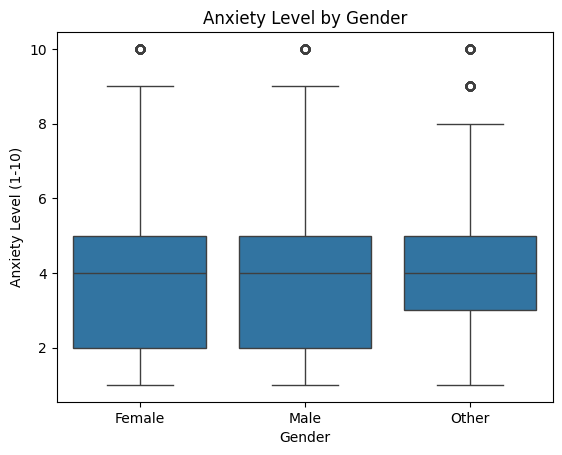

In [28]:
#Boxplot (shows spread and median)
import seaborn as sns
sns.boxplot(x='Gender',y='Anxiety Level (1-10)',data=df)
plt.title('Anxiety Level by Gender')
plt.show()

All three groups have very similar medians (around 4)

The spread is similar — no group has a much wider or tighter range

So visually, there’s no major difference in anxiety between genders

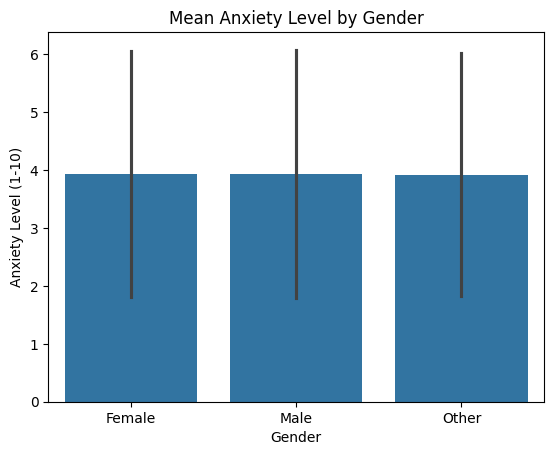

In [30]:
#Barplot (Shows average anxiety)
sns.barplot(x='Gender', y='Anxiety Level (1-10)', data=df, errorbar='sd')
plt.title("Mean Anxiety Level by Gender")
plt.show()


The height of each bar = average anxiety score for each gender

The black line on top of each bar is the standard deviation (error bar)

What you can observe:
All three bars are almost the same height (mean ≈ 3.9)

The error bars overlap a lot, which means:

The differences you see in means could just be due to random variation

This confirms what you saw in the boxplot:
There’s no meaningful difference in anxiety levels across genders based on visuals alone.



In [31]:
#We run a statistical test (t-test) to check if any difference is actually significant.
from scipy.stats import ttest_ind

male = df[df['Gender'] == 'Male']['Anxiety Level (1-10)']
female = df[df['Gender'] == 'Female']['Anxiety Level (1-10)']

t_stat, p_val = ttest_ind(male, female)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")


T-statistic: 0.044
P-value: 0.96494


### Gender vs Anxiety – T-Test Results

We compared average anxiety levels between male and female participants using an independent t-test.

- **T-statistic = 0.044**, **p-value = 0.965**
- This high p-value (> 0.05) tells us that **there is no statistically significant difference** in anxiety levels between genders.
- Visualizations (boxplot and barplot) also showed nearly identical distributions and means.

Therefore Gender does **not** appear to have an effect on anxiety level in this sample.


RQ3:
"Is there a relationship between stress level and anxiety level?"

Variables:
Stress Level (1-10) → Numeric

Anxiety Level (1-10) → Numeric

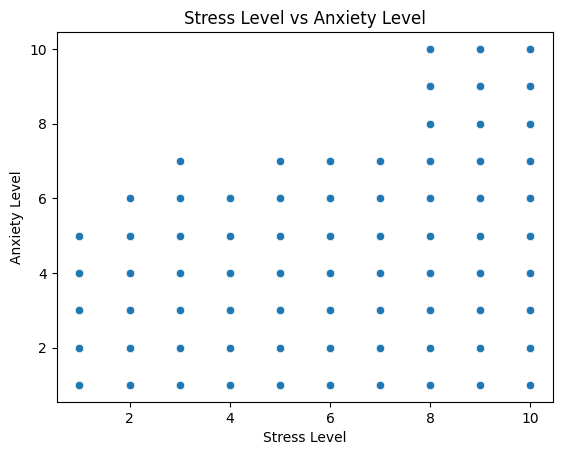

In [32]:
sns.scatterplot(x='Stress Level (1-10)', y='Anxiety Level (1-10)', data=df)
plt.title("Stress Level vs Anxiety Level")
plt.xlabel("Stress Level")
plt.ylabel("Anxiety Level")
plt.show()


In [34]:
# sns.regplot(x='Stress Level (1-10)', y='Anxiety Level (1-10)', data=df, line_kws={"color": "red"})
# plt.title("Regression Line: Stress vs Anxiety")
# plt.show()


In [35]:
from scipy.stats import pearsonr

r, p = pearsonr(df['Stress Level (1-10)'], df['Anxiety Level (1-10)'])
print(f"Correlation Coefficient (r): {r:.3f}")
print(f"P-value: {p:.5f}")


Correlation Coefficient (r): 0.668
P-value: 0.00000


### Stress Level vs Anxiety – Correlation Analysis

We analyzed the relationship between stress levels and anxiety scores.

- **Pearson correlation coefficient**: r = 0.668
- **P-value**: < 0.001

This shows a **strong positive correlation**: as stress levels increase, anxiety scores tend to increase as well.  
The relationship is statistically significant, meaning it is unlikely to be due to chance. This finding supports the well-established link between high stress and increased anxiety.


Doing some more just to see 


"Is there a relationship between how much caffeine a person consumes and their anxiety level?"

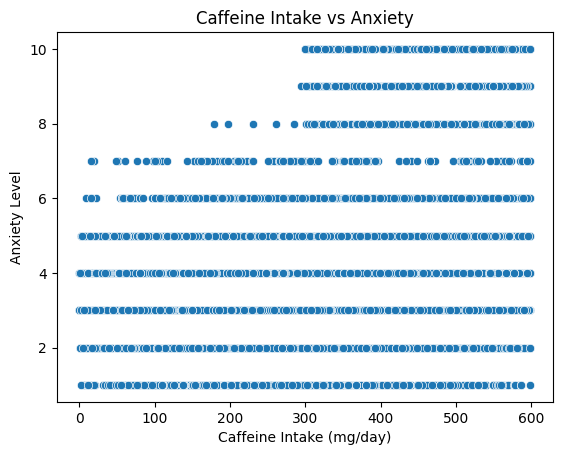

In [37]:
sns.scatterplot(x='Caffeine Intake (mg/day)',y='Anxiety Level (1-10)',data=df)
plt.title('Caffeine Intake vs Anxiety')
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Anxiety Level')
plt.show()


In [38]:
from scipy.stats import pearsonr

r, p = pearsonr(df['Caffeine Intake (mg/day)'], df['Anxiety Level (1-10)'])
print(f"Correlation Coefficient (r): {r:.3f}")
print(f"P-value: {p:.5f}")


Correlation Coefficient (r): 0.351
P-value: 0.00000


### Caffeine Intake vs Anxiety – Correlation Analysis

We explored the relationship between daily caffeine intake (mg/day) and anxiety level (1–10).

- **Pearson correlation coefficient (r)** = 0.351
- **P-value** < 0.001

The analysis shows a **moderate positive correlation** between caffeine intake and anxiety.  
This indicates that individuals who consume more caffeine tend to report higher levels of anxiety.

The result is **statistically significant**, suggesting this is a meaningful relationship, not random variation.

This finding aligns with psychological research that associates excessive caffeine consumption with heightened arousal and anxiety symptoms.


Derive at least 3 hypotheses:

H1: Less sleep is associated with higher anxiety (confirmed)

H2: There is no significant difference in anxiety between genders (not supported, but tested)

H3: Higher stress levels are associated with higher anxiety (confirmed)

H4: Greater caffeine intake is associated with higher anxiety (confirmed)

## Post-hoc Test — Occupation vs Anxiety
Question:
Do anxiety levels differ across multiple occupation groups?

Since this has more than 2 categories, we’ll use:

ANOVA to test if there’s any difference

tukey post-hoc test to find out which groups differ

In [39]:
df['Occupation'].value_counts()


Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64

In [40]:
from scipy.stats import f_oneway

groups = [group['Anxiety Level (1-10)'] for name, group in df.groupby('Occupation')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")


ANOVA F-statistic: 5.080
P-value: 0.00000


C:\Users\Dev\AppData\Local\Temp\ipykernel_23244\2566726352.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Anxiety Level (1-10)'] for name, group in df.groupby('Occupation')]


An ANOVA test showed a significant difference in anxiety levels across occupation groups:
- F-statistic = 5.080
- p-value < 0.001

This indicates that at least one group differs in average anxiety level.


In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Anxiety Level (1-10)'],
                          groups=df['Occupation'],
                          alpha=0.05)

print(tukey)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    Artist    Athlete   0.0749    1.0 -0.2648  0.4145  False
    Artist       Chef   0.0442    1.0 -0.2918  0.3801  False
    Artist     Doctor   0.4034 0.0051  0.0658  0.7409   True
    Artist   Engineer   0.3419  0.045  0.0034  0.6804   True
    Artist Freelancer   0.1561 0.9494 -0.1819  0.4941  False
    Artist     Lawyer   0.4103 0.0046  0.0692  0.7513   True
    Artist   Musician  -0.0069    1.0 -0.3396  0.3257  False
    Artist      Nurse   0.0586    1.0  -0.277  0.3943  False
    Artist      Other  -0.0319    1.0 -0.3696  0.3059  False
    Artist  Scientist   0.2663 0.3063 -0.0723  0.6049  False
    Artist    Student   0.0877 0.9997 -0.2463  0.4216  False
    Artist    Teacher  -0.0465    1.0 -0.3878  0.2948  False
   Athlete       Chef  -0.0307    1.0 -0.3732  0.3118  False
   Athlete     Doctor   

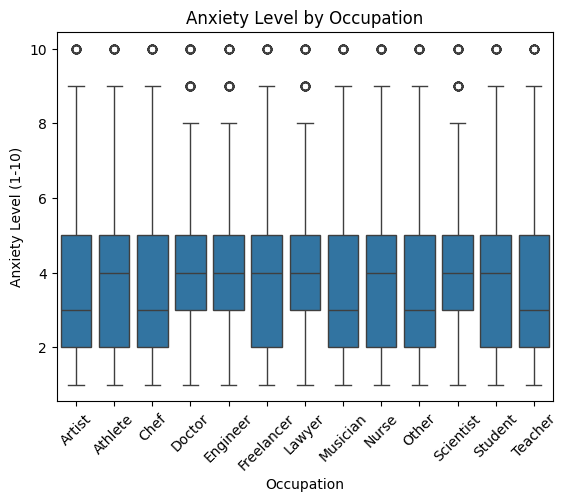

In [42]:
sns.boxplot(x='Occupation', y='Anxiety Level (1-10)', data=df)
plt.title("Anxiety Level by Occupation")
plt.xticks(rotation=45)
plt.show()


To further explore these differences, a **Tukey post-hoc test** was conducted.  
The test identified several **statistically significant pairwise differences**, including:

- **Doctors**, **Lawyers**, and **Engineers** consistently showed **higher anxiety levels** compared to:
  - Artists
  - Musicians
  - Chefs
  - Teachers
  - Others

This suggests that occupations typically associated with high responsibility or performance pressure may be linked to increased anxiety levels.

These findings highlight the potential impact of occupational demands on mental health and support the inclusion of workplace-related factors in anxiety management strategies.
